## Import Libraries..

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,V1,V2,V3,V4,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


In [4]:
df.shape

(1372, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
 2   V3      1372 non-null   float64
 3   V4      1372 non-null   float64
 4   Class   1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
df.describe()

,V1,V2,V3,V4,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,1.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,1.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,1.000000
50%,0.496180,2.319650,0.616630,-0.586650,1.000000
75%,2.821475,6.814625,3.179250,0.394810,2.000000
max,6.824800,12.951600,17.927400,2.449500,2.000000


In [7]:
df[df.duplicated()].shape

(24, 5)

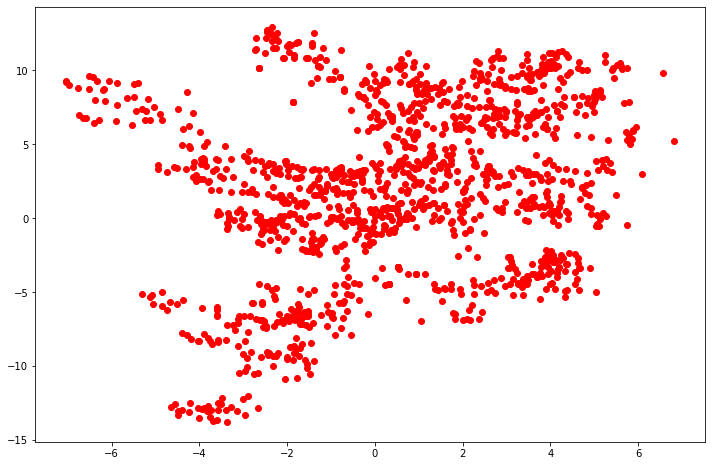

In [8]:
fig = plt.figure(figsize = (12, 8))
plt.scatter(df.V1, df.V2, color = 'red')

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x576 with 0 Axes>

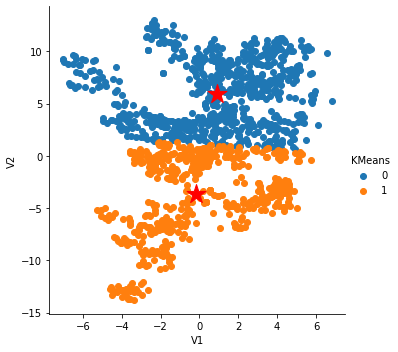

In [9]:
fig = plt.figure(figsize = (12, 8))

my_data = np.column_stack(( df.V1, df.V2 ))

km_model = KMeans(n_clusters = 2).fit(my_data)
my_clusters = km_model.cluster_centers_

# Put assigned labels to the original dataset..
df['KMeans'] = km_model.labels_

p = sns.FacetGrid(data = df, hue = 'KMeans', size = 5)
p.map(plt.scatter, 'V1', 'V2')
p.add_legend()
plt.scatter(my_clusters[:, 0], my_clusters[:, 1], s = 400, marker = '*', c = 'r')

In [10]:
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import KMeans, SpectralClustering

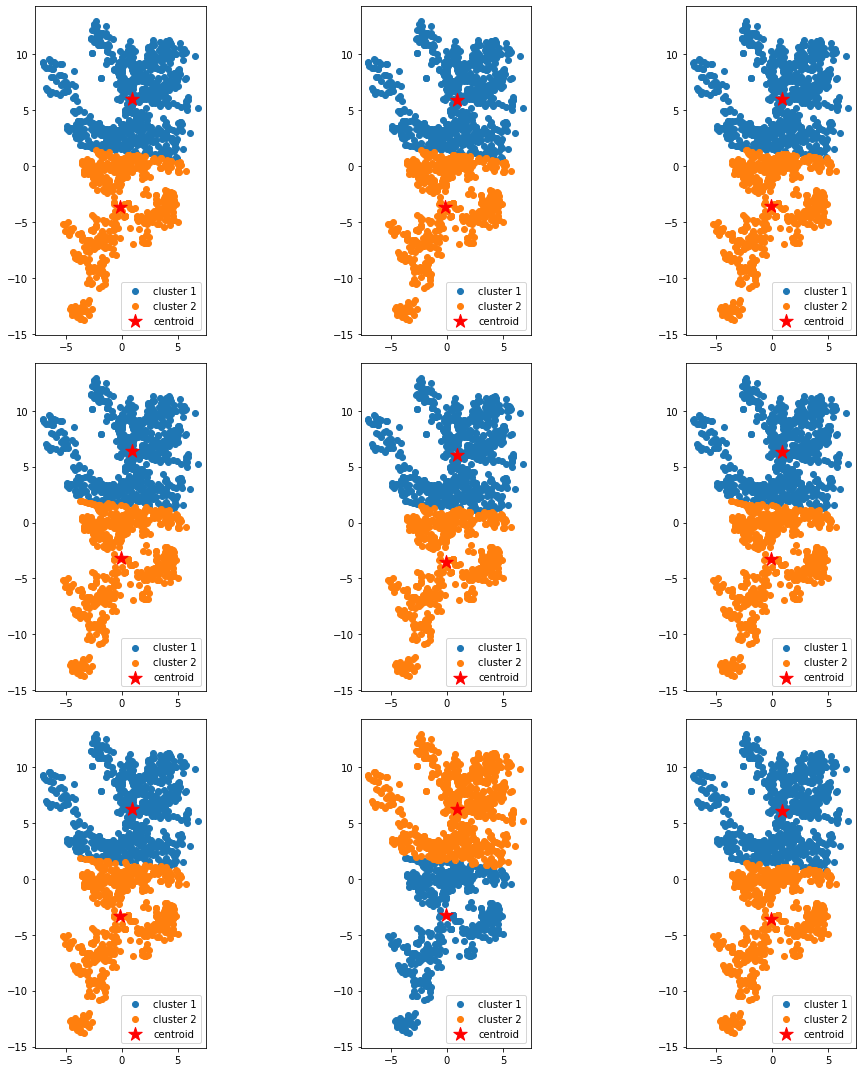

In [11]:
iterr = 9
fig, ax = plt.subplots(3, 3, figsize = (15, 15))
axis = np.ravel(ax)
my_centers = []

for i in range(iterr):
    km_model = KMeans(n_clusters = 2, max_iter = 3)
    km_model.fit(my_data)
    centroids = km_model.cluster_centers_
    my_centers.append(centroids)
    
    axis[i].scatter(my_data[km_model.labels_ == 0, 0], 
                   my_data[km_model.labels_ == 0, 1], label = 'cluster 1')
    
    axis[i].scatter(my_data[km_model.labels_ == 1, 0], 
                   my_data[km_model.labels_ == 1, 1], label = 'cluster 2')
    
    axis[i].scatter(centroids[:, 0], centroids[:, 1], c = 'r', marker = '*',
                   s = 200, label = 'centroid')
    
    axis[i].legend(loc = 'lower right')
    axis[i].set_aspect('equal')

plt.tight_layout()    

In [12]:
km_model.cluster_centers_

array([[ 0.86567648,  6.0343294 ],
       [-0.14390335, -3.57662708]])

In [13]:
df['KMeans'] = km_model.labels_
df.groupby('KMeans').describe()

V1                                                                  \
        count      mean       std     min       25%      50%      75%     max   
KMeans                                                                          
0       783.0  0.866467  2.908259 -7.0421 -0.962905  1.10500  3.20415  6.8248   
1       589.0 -0.141526  2.648255 -5.2943 -2.208300 -0.66008  2.00510  5.7403   

           V2            ...        V4          Class                      \
        count      mean  ...       75%     max  count      mean       std   
KMeans                   ...                                                
0       783.0  6.046704  ... -0.364885  2.1547  783.0  1.319285  0.466498   
1       589.0 -3.560442  ...  0.751700  2.4495  589.0  1.611205  0.487891   

                                 
        min  25%  50%  75%  max  
KMeans                           
0       1.0  1.0  1.0  2.0  2.0  
1       1.0  1.0  2.0  2.0  2.0  

[2 rows x 40 columns]

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'K-Means Result')

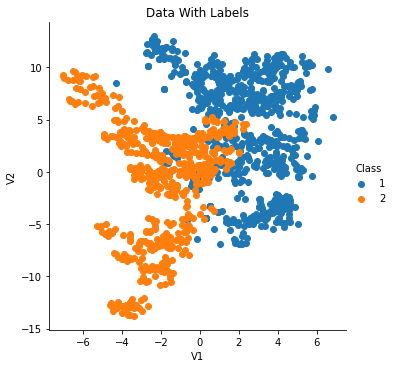

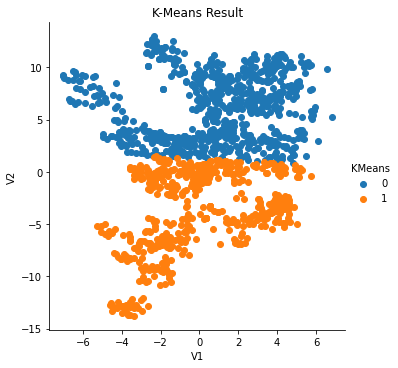

In [14]:
p = sns.FacetGrid(data = df, hue = 'Class', size = 5)
p.map(plt.scatter, 'V1', 'V2')
p.add_legend()
plt.title('Data With Labels')

p = sns.FacetGrid(data = df, hue = 'KMeans', size = 5)
p.map(plt.scatter, 'V1', 'V2')
p.add_legend()
plt.title('K-Means Result')

In [15]:
df['KMeans'] = df['KMeans'].map({0 : 1, 1 : 2})

In [16]:
temp = 0

for i in range(0, 1372):
    if df.Class[i] == df['KMeans'][i]:
        temp += 1
        
print('Accuracy:', temp / 1372)

Accuracy: 0.6508746355685131


# THE END..!!